# <b>1 <span style='color:#0386f7de'>|</span> Introduction</b>
![](https://bankingfiles.com/wp-content/uploads/2019/09/190208-stock-money-fanned-out-ew-317p_fa445b2f6f3e86a3ffa18707e6a8adcb.fit-760w.jpg)
### Context
Salary Classification from various aspects (education, marital-status, occupation, race, and somemore..)
### Objective
Our goal here is to understand the data as much as possible , comparing different models of different companies, asking some
questions that will allow us to understand the data beter and predict if the salary whether less than 50K or greater than 50K ?
### Explanation of the variables of the dataset
1. age : continuous.
2. workclass:  a general term to represent the employment status of an individual
    - Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt:  this is the number of people that census believes the entry represents
    - continuous.
4. education: Preschool , 1st-4th , 5th-6th , 7th-8th , 9th , 10th , 11th , 12th , HS-grad , Prof-school , Assoc-acdm , Assoc-voc , Some-college , Bachelors , Masters , Doctorate
5. education-num: a number that describe your education status from preschool to doctorate.
6. marital-status: marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.
- Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: represents what this individual is relative to other
    - Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. salary: <=50K or >50K

# <b>2 <span style ='color:#0386f7de'>|</span> Importing Libraries</b>

In [76]:
!pip install  bioinfokit

In [77]:
import sys
sys.path.insert(1,'/kaggle/input/catreg')
from catReg import categoricalRegression

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
sns.set_style("whitegrid")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA , QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict , cross_val_score

# <b>3 <span style ='color:#0386f7de'>|</span> Loading the data</b>

In [78]:
df = pd.read_csv('../input/salary-prediction-classification/salary.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [79]:
df.describe().mean() - df.describe().median()

age                 4066.361937
fnlwgt            146672.668026
education-num       4067.666335
capital-gain       17089.043194
capital-loss        4632.256091
hours-per-week      4064.629383
dtype: float64

#### Insight :
   1. Always compare mean and median with your eyes as If the distribution is symmetric then the mean is equal to the median and the distribution will have zero skewness , it seems that we have skewness we will explore during EDA.

# <b>4 <span style ='color:#0386f7de'>|</span> Exploratory Data Analysis</b>
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

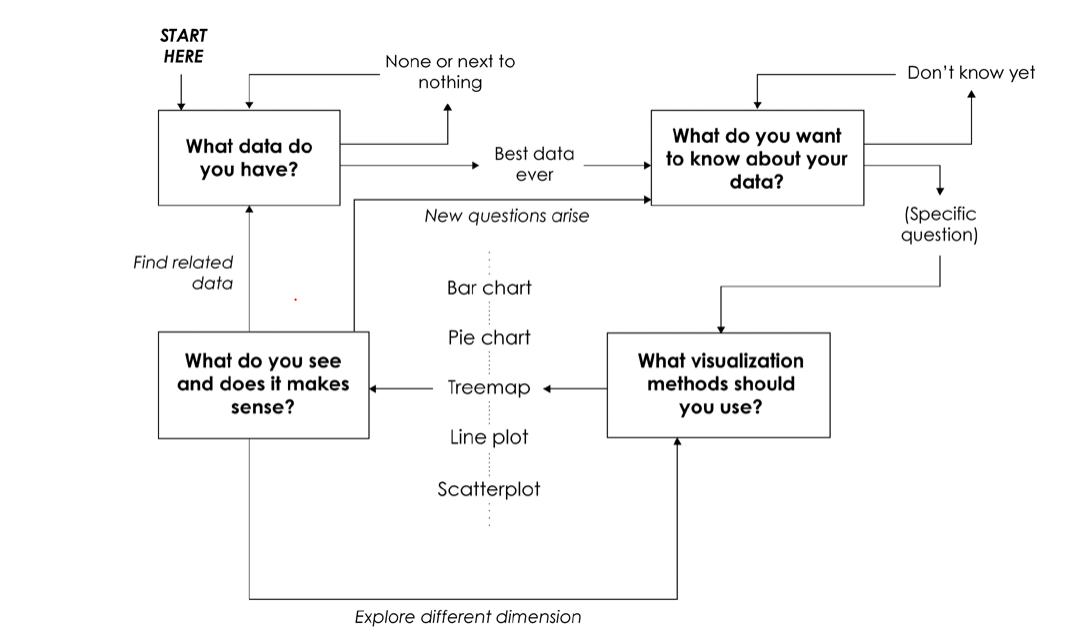
 

#### Q1 | Does the older get more money ?


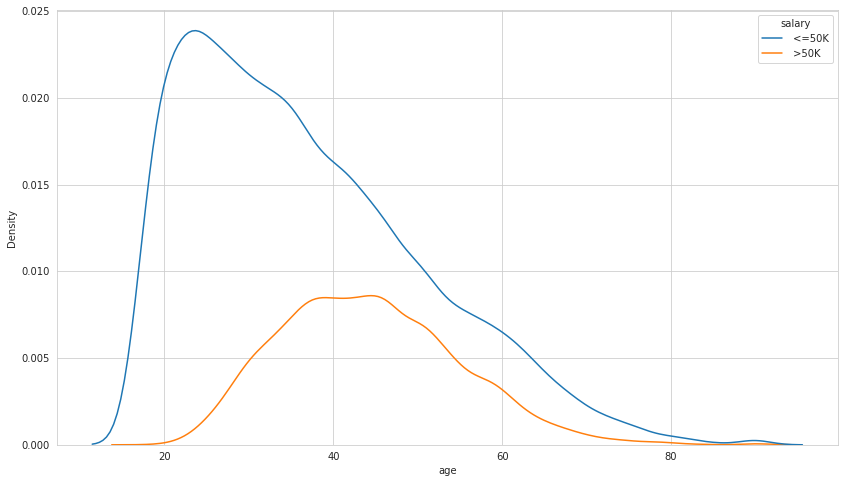

In [80]:
plt.figure(figsize=(14,8))
sns.kdeplot(data = df , x = 'age' ,hue='salary')
plt.show()

#### Insight :
-  In the early twenties people making less money which is normal and as they get older start making more money and the curve of >50 increase and the curve of <=50 decrease till the peak at the forties, then starting gaining less money

### Related questions ?
1. what are the jobs of those who are more than 80 years old ?
2. what are the jobs of those who are less than 20 years old and making more than 50K ?

In [81]:
df_old = df[(df.age > 80)&(df['hours-per-week'] >=50)]
df_old

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
5370,90,Local-gov,227796,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K
5406,90,Private,51744,Masters,14,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,50,United-States,>50K
6232,90,Self-emp-not-inc,155981,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,10566,0,50,United-States,<=50K
7481,83,Private,195507,HS-grad,9,Widowed,Protective-serv,Not-in-family,White,Male,0,0,55,United-States,<=50K
7720,84,Private,241065,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
8806,90,Private,87372,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K
10545,90,Private,175491,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,9386,0,50,Ecuador,>50K
11996,90,Private,40388,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
12830,81,Private,201398,Masters,14,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,?,<=50K
15356,90,Private,90523,HS-grad,9,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K


#### Insight :
- Opss ,We can see that the data has missing values  
- That does not make sense to be more than 80 and be able to work more than 50 hours per week (10 hours per day)! , But as you can see most of them are Unmarried or not family, so maybe they need to rely on themselves financially and the remaining are Self-emp-inc so they may be not working with their hand

In [82]:
df.replace(' ?' , np.nan ,inplace=True)
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [83]:
df.occupation.fillna(value='Other-service' , inplace=True)
df['native-country'].fillna(value='Other' , inplace=True)
df.workclass.fillna(value='Other' , inplace=True)

In [84]:
df.drop(df.loc[df_old.index].index,axis=0,inplace=True)

In [85]:
df_young = df[(df.age <=20)&(df['salary'] ==' >50K')]
df_young

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7741,19,Private,323605,7th-8th,4,Never-married,Other-service,Not-in-family,White,Male,0,0,60,United-States,>50K
22910,19,Other,200790,12th,8,Married-civ-spouse,Other-service,Other-relative,White,Female,15024,0,40,United-States,>50K


- because we don't have enough info about that occupation that give to 19 years-old more than 50K per year epically one of them is Academically late , iwill consider these two rows outliers

In [86]:
df.drop(df.loc[df_young.index].index,axis=0,inplace=True)

#### Q2 | Does more education means more money ?

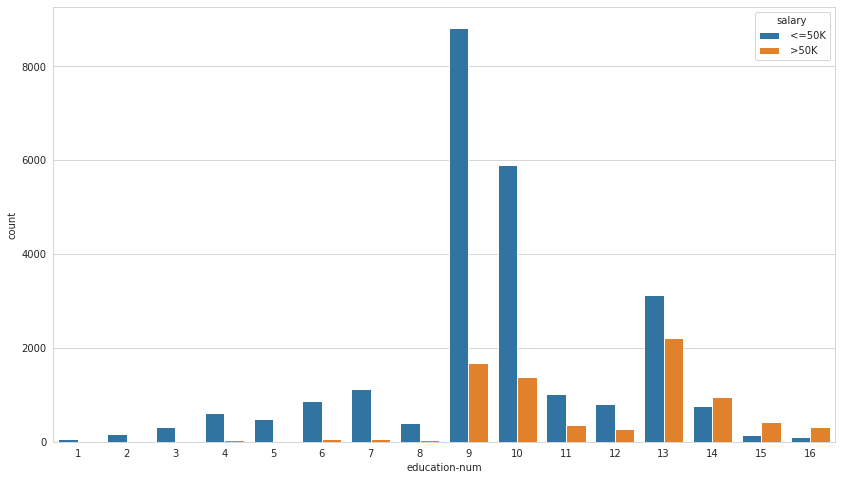

In [87]:
plt.figure(figsize=(14,8))
sns.countplot(data =df , x = 'education-num', hue = 'salary')
plt.show()

#### Insight :
- that is true but you have to wait till reach educations-num 14(Bachelors) 

#### Q3 | Does being man means more money ?

In [88]:
df_genedr_education = df.groupby(['education-num' , 'sex'])['salary'].count().reset_index()

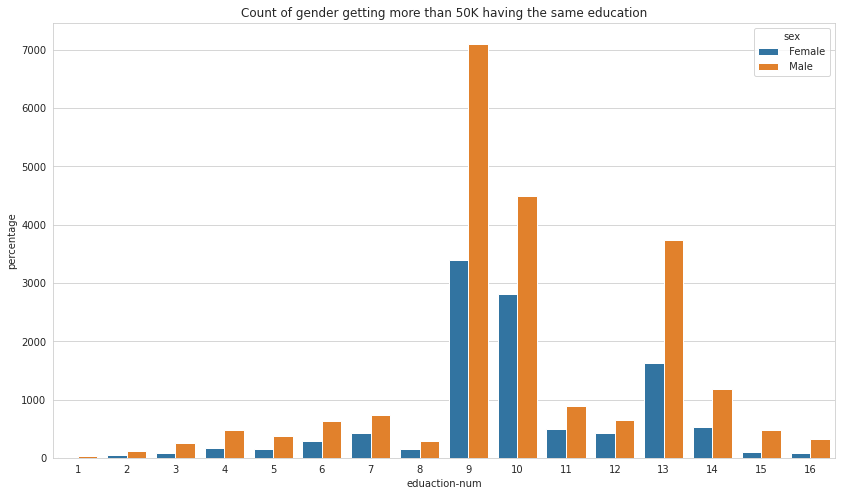

In [89]:
plt.figure(figsize=(14,8))
sns.barplot(x = 'education-num' , y = 'salary' , hue = 'sex' , data = df_genedr_education)
plt.title('Count of gender getting more than 50K having the same education')
plt.xlabel('eduaction-num')
plt.ylabel('percentage')
plt.show()

#### Insight :
- Unfortunately that is true, because the number of male is more than female for all education number

#### Q4 | Which workclass that paying more money ?

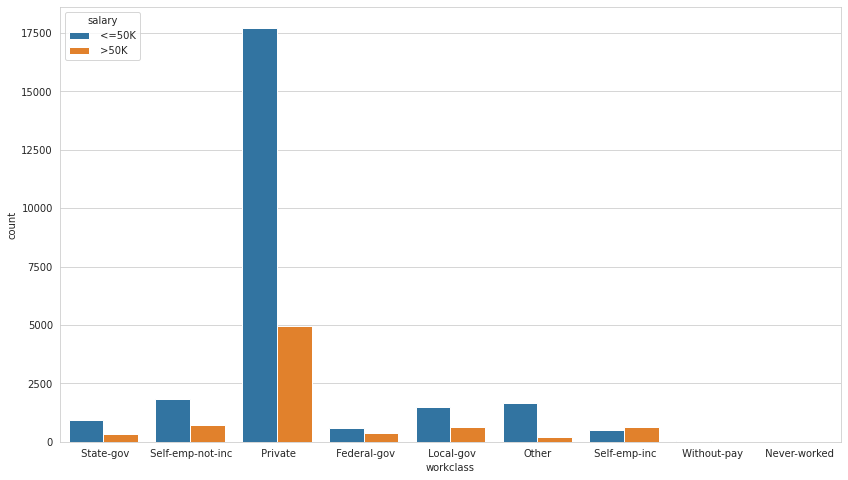

In [90]:
plt.figure(figsize=(14,8))
sns.countplot(data =df , x = 'workclass', hue = 'salary')
plt.show()

#### Insight :
- private sector is dominates that market

#### Q5 | Which race dominates the USA market ?

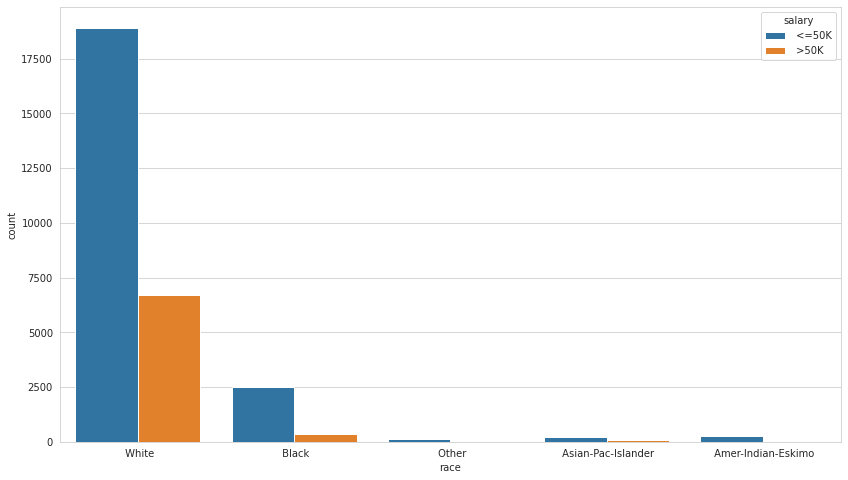

In [91]:
plt.figure(figsize=(14,8))
sns.countplot(data =df[df['native-country'] ==' United-States'] , x = 'race', hue = 'salary')
plt.show()

#### Insight :
- white race is dominates the jobs

# <b>5 <span style='color :#0386f7de'>| </span>  Data Preprocessing</b>

In [92]:
df['salary'] = df['salary'].map( {' >50K': 1, ' <=50K': 0} )
df['age_education'] = df['age'] * df['education-num']
df['education_hours'] = df['education-num'] * df['hours-per-week']

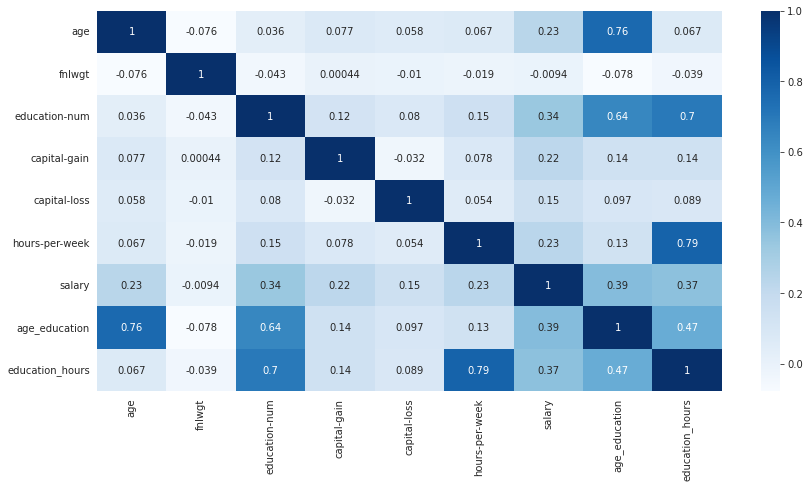

In [93]:
plt.figure(figsize = (14,7))
sns.heatmap(df.corr() , annot=True , cmap = 'Blues')
plt.show()

- Not bad!

In [94]:
df['native-country'].value_counts()

 United-States                 29155
 Mexico                          643
Other                            582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

as you can see we need to deal with  $native-country$ because that huge number will ruin our model (lead to a high-dimensional feature space, which may result in overfitting or make the model computationally expensive.) , we could just use target encode but first let's remove space

In [95]:
df['native-country'] =df['native-country'].apply(lambda x : x.strip())

In [96]:
def target_encoding(df, encode_col ,target_col,encoded_col_name):
    'This function is replacing the encode_col with a one of [low , mediun , high] bins'
    
    means = df.groupby(encode_col)[target_col].mean()  
    bins = [-0.2 , 0.12 , 0.26 , 0.4]
    cars_bin=['low','Medium','high']
    df[encoded_col_name] = pd.cut(df[encode_col].map(means)  ,bins,right=False,labels=cars_bin )
    df.drop(encode_col , axis = 1 , inplace = True)
    return df

In [97]:
df = target_encoding(df ,'native-country' , 'capital-gain' , 'native-country-encoded' )

- because the numerical variable <b> education-num </b> represnt the categorical <b> education </b> ,so i will remove the categorical one

In [98]:
df.drop('education' ,axis = 1 , inplace=True)

In [99]:
y = df['salary']
df.drop('salary' ,axis = 1 , inplace=True)

In [100]:
categorical_variable = df.select_dtypes(include=['object' , 'category']).columns
numerical_variable = df.select_dtypes(exclude=['object' , 'category']).columns

In [101]:
df_dummies=pd.get_dummies(df , columns=categorical_variable , drop_first=True)

In [102]:
def get_baseline(df ,categorical_columns ,  df_dummies):
    # Step 1: Create a dictionary of dummy columns for each original categorical column
    columns_dummies = {}
    for dummy_column in df_dummies.columns:
        column  = dummy_column.split('_')
        if len(column) > 1 :
            columns_dummies.setdefault(column[0], []).append(column[1])

    # Step 2: Find baseline values for each categorical column             
    column_baselines = {}
    for column in df[categorical_columns] :
        for value in df[column].unique():
            if value not in columns_dummies[column] :
                column_baselines[column] = value
                
                
    return column_baselines

In [103]:
column_baselines = get_baseline(df , categorical_variable , df_dummies)
column_baselines

{'workclass': ' Federal-gov',
 'marital-status': ' Divorced',
 'occupation': ' Adm-clerical',
 'relationship': ' Husband',
 'race': ' Amer-Indian-Eskimo',
 'sex': ' Female',
 'native-country-encoded': 'low'}

In [104]:
X_train, X_test, y_train, y_test = train_test_split(df_dummies , y , test_size=0.2 ,shuffle=True, random_state=41)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (26035, 48)
Shape of testing feature: (6509, 48)
Shape of training label: (26035,)
Shape of training label: (6509,)


In [105]:
num_cols = [x for x in df.columns if df[x].dtype != 'object']
scaler = StandardScaler()
X_train[numerical_variable] = scaler.fit_transform( X_train[numerical_variable] )
X_test[numerical_variable] = scaler.transform( X_test[numerical_variable] )

# <b>6 <span style='color :#0386f7de'>| </span> Modeling </b>

####  Searching for the ones that fit the best

In [106]:
random_state = 2
classifiers = []
classifiers.append(LogisticRegression(random_state = random_state ,max_iter=1000))
classifiers.append(QDA())
classifiers.append(LDA())
classifiers.append(GaussianNB())
classifiers.append(KNeighborsClassifier())

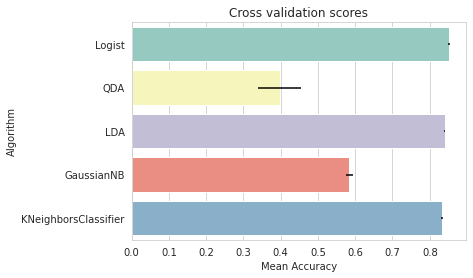

In [107]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier,X_train, y_train, scoring = "accuracy", cv =5, n_jobs=4))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors":cv_std,"Algorithm":["Logist","QDA","LDA",
"GaussianNB","KNeighborsClassifier"]})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res,palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

it seems that the logist the highest mean accuracy let's refine the feature

In [108]:
def rfe_refined(X , y ):
    # Split the data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    feature_names = X_train.columns
    # Create a logistic regression model
    model = LogisticRegression()
    
    # Initialize best accuracy
    best_accuracy = 0
    
    # Initialize features indices array
    features_indices  = np.arange(X.shape[1])
    
    while len(features_indices) > 1 :
        # Fit the model on the training data
        model.fit(X_train.iloc[:, features_indices ], y_train)
        
        # Get feature importances or coefficients
        if hasattr(model, 'coef_'):
            feature_importances = np.abs(model.coef_[0])
        else:
            feature_importances = model.feature_importances_
            
        
        # Identify the least important feature
        least_important_feature_index = np.argmin(feature_importances)

        # Remove the least important feature from features indices array
        features_indices = np.delete(features_indices , least_important_feature_index)
        
        # Re-fit the model and evaluate on the test set
        model.fit(X_train.iloc[:, features_indices ], y_train)
        y_pred = model.predict(X_test.iloc[:, features_indices ])
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy  > best_accuracy :
            print(f'{"# "+ str(len(features_indices))} ---------------- Accuracy improved from {round(best_accuracy, 4)} to {round(accuracy, 4)}----------------')
            best_accuracy = accuracy
            best_feature = feature_names[features_indices]
        else :
            print('---------------- No Accuracy improvment ----------------')
    return best_feature
        

In [109]:
best_feature = rfe_refined(X_train , y_train)

# 47 ---------------- Accuracy improved from 0 to 0.8562----------------
---------------- No Accuracy improvment ----------------
---------------- No Accuracy improvment ----------------
---------------- No Accuracy improvment ----------------
---------------- No Accuracy improvment ----------------
# 42 ---------------- Accuracy improved from 0.8562 to 0.8563----------------
---------------- No Accuracy improvment ----------------
# 40 ---------------- Accuracy improved from 0.8563 to 0.8565----------------
---------------- No Accuracy improvment ----------------
---------------- No Accuracy improvment ----------------
---------------- No Accuracy improvment ----------------
# 36 ---------------- Accuracy improved from 0.8565 to 0.8567----------------
---------------- No Accuracy improvment ----------------
---------------- No Accuracy improvment ----------------
---------------- No Accuracy improvment ----------------
---------------- No Accuracy improvment ----------------
---------

In [110]:
X_train = X_train[best_feature]
X_test = X_test[best_feature]

In [111]:
def build_model(X,y , print_summary = True):
    'This function is building the model and return the summary and results '
    X = sm.add_constant(X) 
    lm = sm.Logit(y,X).fit()
    if print_summary:
        print(lm.summary()) 
    return X , lm

In [112]:
X_train_tmp , model  = build_model(X_train , y_train)

         Current function value: 0.318394
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                26035
Model:                          Logit   Df Residuals:                    25998
Method:                           MLE   Df Model:                           36
Date:                Thu, 07 Dec 2023   Pseudo R-squ.:                  0.4246
Time:                        07:49:44   Log-Likelihood:                -8289.4
converged:                      False   LL-Null:                       -14405.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -3.7659      0.371    -10.142      0.000      -4.494      

In [113]:
X_train_tmp.drop(['workclass_ Without-pay' , 'workclass_Other'  ,'occupation_ Priv-house-serv','occupation_ Transport-moving',
                 'occupation_Other-service','relationship_ Other-relative' , 'relationship_ Unmarried' ] , inplace= True , axis = 1)

In [114]:
X_train_tmp , model  = build_model(X_train_tmp , y_train)

Optimization terminated successfully.
         Current function value: 0.320254
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                26035
Model:                          Logit   Df Residuals:                    26005
Method:                           MLE   Df Model:                           29
Date:                Thu, 07 Dec 2023   Pseudo R-squ.:                  0.4212
Time:                        07:49:44   Log-Likelihood:                -8337.8
converged:                       True   LL-Null:                       -14405.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -4.0582      0.230    

In [115]:
X_train_tmp.drop(['workclass_ Local-gov' , 'workclass_ Private' ] , inplace= True , axis = 1)

In [116]:
X_train_tmp , model  = build_model(X_train_tmp , y_train)

Optimization terminated successfully.
         Current function value: 0.320371
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                26035
Model:                          Logit   Df Residuals:                    26007
Method:                           MLE   Df Model:                           27
Date:                Thu, 07 Dec 2023   Pseudo R-squ.:                  0.4210
Time:                        07:49:45   Log-Likelihood:                -8340.9
converged:                       True   LL-Null:                       -14405.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -4.0504      0.221    

In [117]:
X_test_con = sm.add_constant(X_test)
X_test = X_test_con[X_train_tmp.columns]

In [118]:
def evaluate_model(model, x_test, y_test , threshold_range):
    for threshold in np.arange(threshold_range[0], threshold_range[1], 0.05):
        
        # Choosing each threshold
        y_pred = model.predict(x_test) > threshold

        # Display results for each threshold
        print(f'For threshold {threshold:.2f}:')
        print(classification_report(y_test, y_pred))

In [119]:
evaluate_model(model , X_test , y_test ,[ 0.4 , 0.6])

For threshold 0.40:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4976
           1       0.67      0.69      0.68      1533

    accuracy                           0.85      6509
   macro avg       0.79      0.79      0.79      6509
weighted avg       0.85      0.85      0.85      6509

For threshold 0.45:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4976
           1       0.69      0.65      0.67      1533

    accuracy                           0.85      6509
   macro avg       0.79      0.78      0.79      6509
weighted avg       0.85      0.85      0.85      6509

For threshold 0.50:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4976
           1       0.72      0.60      0.65      1533

    accuracy                           0.85      6509
   macro avg       0.80      0.76      0.78      6509
weighted avg  

lets' interpret the coffient of the model , here we are dealing with logistic function $$p(x) = (e^{b0 + b1*X}) / (1 + e^{b0 + b1*x}) $$
as because the relation between p(X) and X  is not a straight line so b1 dose not correspond to the change in p(X) associated with one unit increase in X , and ncreasing X by one unit changes the log odds by β1
$$log(p(X) / 1-p(X)) = b0 + b1*X$$
so if we take the exp of the two sides
$$p(X) / 1-p(X) = e^{b0 + b1*x} $$
so increasing X with a unit is associated with $$(e^{b1}-1) *  100% $$ increase in the odds of the event, so having first odds we can get the second odds then we can get the probabiliy p2 then get the differenc and that is change in probability in case of increase x with one-unit.


In [121]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                26035
Model:                          Logit   Df Residuals:                    26007
Method:                           MLE   Df Model:                           27
Date:                Thu, 07 Dec 2023   Pseudo R-squ.:                  0.4210
Time:                        07:51:05   Log-Likelihood:                -8340.9
converged:                       True   LL-Null:                       -14405.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -4.0504      0.221    -18.350      0.000      -4.483      -3.618
age                                    0.3367      0.024   

In [122]:
column_baselines

{'workclass': ' Federal-gov',
 'marital-status': ' Divorced',
 'occupation': ' Adm-clerical',
 'relationship': ' Husband',
 'race': ' Amer-Indian-Eskimo',
 'sex': ' Female',
 'native-country-encoded': 'low'}

/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


okay 
- b0 represent our baseline cases 
     -   {'workclass': ' Federal-gov',
         'marital-status': ' Divorced',
         'occupation': ' Adm-clerical',
         'relationship': ' Husband',
         'race': ' Amer-Indian-Eskimo',
         'sex': ' Female',
         'native-country-encoded': 'low'} with
           - probaility of 1 /  (1 + np.exp(4.0504)) = 0.01711
           - odds is np.exp(-4.0504) = 0.0174
                 
- b1 represent age so if you are in a meeting and someone asks you keep all other variable costant is we increased age with one year how the age would affect ?
    - let say that we are in moving forward from our baseline case , increasing age with one would cause a change in odds with (np.exp(0.3367) - 1 ) = 0.400 , then odds2 = 0.0174 * 0.400 + 0.0174 = 0.02436
        - p2 = 0.02436 / 0.02436+ 1 = 0.02378
        so increasing age by one keep holding all other varialbe increase the probabilty of having > 50 K is 0.02378 - 0.01711 = 0.006 around 0.6%


In [30]:
def percentage_increase(odds_base , p_base , b , name_of_variable):
    odds_change = np.exp(b) -1
    odds2 = odds_change * odds_base + odds_base
    p = odds2 /( odds2 + 1)
    return f'Increasing a unit in {name_of_variable} would affect the probability of getting >50K by {round(p - p_base , 5) *100}%'

In [32]:
percentage_increase(0.0174 , 0.01711 , -0.8324 , 'workclass_ State-gov')

'Increasing a unit in workclass_ State-gov would affect the probability of getting >50K by -0.96%'